In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"cities = {len(cities)}")


cities = 583


In [3]:
citylist = pd.DataFrame({"City":cities} )
citylist.to_csv('output_data/cities.csv', index=False)
citylist.head()

,City
0,saldanha
1,maniitsoq
2,porto novo
3,fortuna
4,udachnyy


In [4]:
weather_df = pd.DataFrame({'City':cities})
weather_df['Country'] = ""
weather_df['Lat'] = ""
weather_df['Lng'] = ""
weather_df['Date'] = ""
weather_df['Max Temp'] = ""
weather_df['Humidity'] = ""
weather_df['Wind Speed'] = ""
weather_df['Cloudiness'] = ""
weather_df.head()

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Wind Speed,Cloudiness
0,saldanha,,,,,,,,
1,maniitsoq,,,,,,,,
2,porto novo,,,,,,,,
3,fortuna,,,,,,,,
4,udachnyy,,,,,,,,


In [5]:
count = 1
print(f"Beginning Data Retrieval")
print(f"-----------------------------")
for index, row in weather_df.iterrows():
    try:
        url = "http://api.openweathermap.org/data/2.5/weather?"
        units = "imperial"

        query_url = f"{url}appid={api_key}&q={weather_df.loc[index, 'City']}&units={units}"

        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        print(f"Processing record {count} for {weather_df.loc[index, 'City']}")
        count += 1
        
        weather_df.loc[index, 'Max Temp'] = weather_json["main"]["temp_max"]
        weather_df.loc[index, 'Country'] = weather_json['sys']['country']
        weather_df.loc[index, 'Humidity'] = weather_json['main']['humidity']
        weather_df.loc[index, 'Cloudiness'] = weather_json['clouds']['all']
        weather_df.loc[index, 'Wind Speed'] = weather_json['wind']['speed']
        weather_df.loc[index, 'Date'] = weather_json['dt']
        weather_df.loc[index, 'Lat'] = weather_json['coord']['lat']
        weather_df.loc[index, 'Lng'] = weather_json['coord']['lon']
    
    except KeyError:
        print(f"City not found. Skipping...")

print(f"-----------------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing record 1 for saldanha
Processing record 2 for maniitsoq
Processing record 3 for porto novo
Processing record 4 for fortuna
Processing record 5 for udachnyy
Processing record 6 for belushya guba
City not found. Skipping...
Processing record 7 for carnarvon
Processing record 8 for mys shmidta
City not found. Skipping...
Processing record 9 for barentsburg
City not found. Skipping...
Processing record 10 for ust-kamchatsk
City not found. Skipping...
Processing record 11 for grimshaw
Processing record 12 for ushuaia
Processing record 13 for busselton
Processing record 14 for hinatuan
Processing record 15 for lata
Processing record 16 for tautira
Processing record 17 for luan
Processing record 18 for bengkulu
City not found. Skipping...
Processing record 19 for dali
Processing record 20 for vaini
Processing record 21 for hilotongan
Processing record 22 for punta arenas
Processing record 23 for barrow
Processing record 24 for 

Processing record 217 for berlevag
Processing record 218 for hithadhoo
Processing record 219 for bairiki
City not found. Skipping...
Processing record 220 for enterprise
Processing record 221 for palmer
Processing record 222 for humaita
Processing record 223 for quatre cocos
Processing record 224 for comodoro rivadavia
Processing record 225 for ixtapa
Processing record 226 for signagi
City not found. Skipping...
Processing record 227 for bassar
Processing record 228 for orda
Processing record 229 for datong
Processing record 230 for olafsvik
City not found. Skipping...
Processing record 231 for thinadhoo
Processing record 232 for ponta do sol
Processing record 233 for altamont
Processing record 234 for port hedland
Processing record 235 for edendale
Processing record 236 for hilo
Processing record 237 for aklavik
Processing record 238 for aykhal
Processing record 239 for bulawayo
Processing record 240 for qaanaaq
Processing record 241 for yulara
Processing record 242 for zatoka
Process

Processing record 429 for turiacu
Processing record 430 for rize
Processing record 431 for piranhas
Processing record 432 for gaya
Processing record 433 for alamosa
Processing record 434 for clonakilty
Processing record 435 for nishihara
Processing record 436 for saint-joseph
Processing record 437 for najran
Processing record 438 for mutsamudu
City not found. Skipping...
Processing record 439 for batagay-alyta
Processing record 440 for havre-saint-pierre
Processing record 441 for shahpura
Processing record 442 for bucerias
Processing record 443 for lumberton
Processing record 444 for kuryk
Processing record 445 for gazli
Processing record 446 for cockburn town
Processing record 447 for gayny
Processing record 448 for samarai
Processing record 449 for inta
Processing record 450 for turayf
Processing record 451 for port hardy
Processing record 452 for palu
Processing record 453 for souillac
Processing record 454 for zhongshu
Processing record 455 for cidreira
Processing record 456 for in

In [6]:
weather_df.head()

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Wind Speed,Cloudiness
0,saldanha,PT,41.42,-6.55,1541267526,48.53,87,3,0
1,maniitsoq,GL,65.42,-52.9,1541267874,13.66,100,8.03,20
2,porto novo,BR,-23.68,-45.44,1541268000,91.4,41,10.29,40
3,fortuna,ES,38.18,-1.13,1541266200,62.6,72,3.36,0
4,udachnyy,RU,66.42,112.4,1541267875,7,67,5.01,48


In [7]:
weather_df.to_csv('output_data/weather_df.csv', index=False)
weather_df = pd.read_csv('output_data/weather_df.csv')
weather_df.head()

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Wind Speed,Cloudiness
0,saldanha,PT,41.42,-6.55,1.541268e+09,48.53,87.0,3.00,0.0
1,maniitsoq,GL,65.42,-52.90,1.541268e+09,13.66,100.0,8.03,20.0
2,porto novo,BR,-23.68,-45.44,1.541268e+09,91.40,41.0,10.29,40.0
3,fortuna,ES,38.18,-1.13,1.541266e+09,62.60,72.0,3.36,0.0
4,udachnyy,RU,66.42,112.40,1.541268e+09,7.00,67.0,5.01,48.0


In [8]:
weather_df.dropna(inplace=True)
weather_df.head()

,City,Country,Lat,Lng,Date,Max Temp,Humidity,Wind Speed,Cloudiness
0,saldanha,PT,41.42,-6.55,1.541268e+09,48.53,87.0,3.00,0.0
1,maniitsoq,GL,65.42,-52.90,1.541268e+09,13.66,100.0,8.03,20.0
2,porto novo,BR,-23.68,-45.44,1.541268e+09,91.40,41.0,10.29,40.0
3,fortuna,ES,38.18,-1.13,1.541266e+09,62.60,72.0,3.36,0.0
4,udachnyy,RU,66.42,112.40,1.541268e+09,7.00,67.0,5.01,48.0


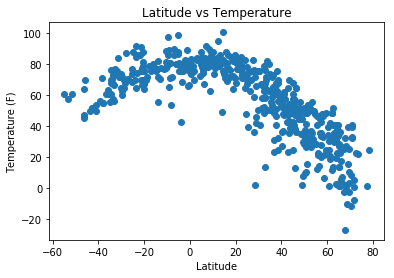

<Figure size 432x288 with 0 Axes>

In [9]:
#Temp/Lat Graph
x = weather_df['Lat']
y = weather_df['Max Temp']
plt.scatter(x, y)
plt.title("Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()
plt.savefig("output_data/Lat vs Temp.png")

In [10]:
weather_df = weather_df[(weather_df['Humidity'] <=100)]

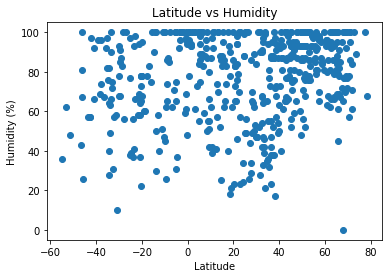

<Figure size 432x288 with 0 Axes>

In [11]:
#Humidity/Lat Graph
x = weather_df['Lat']
y = weather_df['Humidity']
plt.scatter(x, y)
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()
plt.savefig("output_data/Lat vs Hum.png")

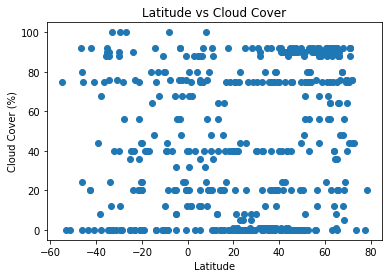

<Figure size 432x288 with 0 Axes>

In [12]:
#Cloud Cover/Lat Graph
x = weather_df['Lat']
y = weather_df['Cloudiness']
plt.scatter(x, y)
plt.title("Latitude vs Cloud Cover")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover (%)")
plt.show()
plt.savefig("output_data/Lat vs Clouds.png")

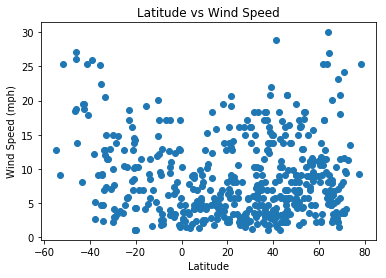

<Figure size 432x288 with 0 Axes>

In [13]:
#Wind Speed/Lat Graph
x = weather_df['Lat']
y = weather_df['Wind Speed']
plt.scatter(x, y)
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()
plt.savefig("output_data/Lat vs Wind.png")

In [ ]:
# 1. There is a strong relationship between latitude and maximum temperature. Maximum temperature increases as you get closer
# to the equator.
# 2. There are more cities in the dataset from the northern hemisphere than the southern hemisphere. This is due to more land
# mass in the northern hemisphere.
# 3. The northern hemisphere in general is colder than the southern hemisphere. This is due to the tilt of the earth, which
# causes the seasons. It is currently winter in the northern hemisphere and summer in the southern hemisphere.
